# **Pagerank (Tugas 4)**

Pagerank adalah algoritma yang digunakan dalam analisis jaringan dan pengurutan halaman web. Algoritma Pagerank mengukur kepentingan relatif dari setiap halaman web dalam suatu jaringan dengan menganalisis jumlah dan kualitas tautan masuk ke halaman tersebut dari halaman web lain dalam jaringan.

## **Membuat Graph**

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Membuat Graph 9 Node

In [8]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4),(4,5),(4,6),(5,6),(5,7),(5,8),(6,7),(6,8),(7,8),(7,9)])

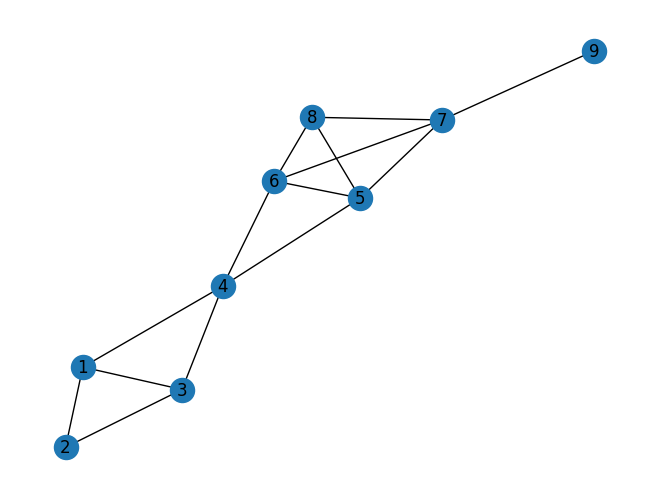

In [9]:
nx.draw(G, with_labels=True)
plt.show()

### Perhitungan Manual

In [10]:
d = 0.85 # Damping factor
max_iter = 100
tolerance = 1.0e-6
N = len(G.nodes())
pagerank = dict.fromkeys(G.nodes(), 1.0/N)
for i in range(max_iter):
    diff = 0
    for node in G.nodes():
        rank = 1 - d
        for neighbor in G.neighbors(node):
            rank += d * pagerank[neighbor] / G.degree(neighbor)
        diff += abs(pagerank[node] - rank)
        pagerank[node] = rank
    if diff < N * tolerance:
        break

print("Hasil Perhitungan:\n", pagerank)

Hasil Perhitungan:
 {1: 0.9976409644640096, 2: 0.7153297101921915, 3: 0.9976414752804466, 4: 1.2280550499924572, 5: 1.2064128853233231, 6: 1.2064130819512038, 7: 1.2882511897618658, 8: 0.9364788958702334, 9: 0.4237533778243965}


### Perhitungan Dengan NetworkX

In [11]:
pg = nx.pagerank(G, alpha=0.85)
print("Networkx pagerank:\n", pg)

Networkx pagerank:
 {1: 0.11085242532970185, 2: 0.07948362274014723, 3: 0.11085242532970185, 4: 0.13645209029225677, 5: 0.13404444415308828, 6: 0.13404444415308828, 7: 0.14313616991007672, 8: 0.10405142282202429, 9: 0.04708295526991471}


## **Text Summarization**

In [12]:
!pip install PyPDF2
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 14.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=fa434566508f7479a6fbda234f1318f15e2f258a592b1f9693a5d7ab8a1d599d
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


### Import Library

In [13]:
import numpy as np
import requests
import io
import PyPDF2
import docx2txt
import sys
from nltk.tokenize.punkt import PunktSentenceTokenizer
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### Menentukan Type Document

Menentukan tipe dokumen yang akan dibaca, apakah dalam format .txt atau .pdf, atau tidak valid.

Jika tipe dokumen yang dibaca adalah dalam format .txt, maka fungsi akan membuka file dan membaca isi dari file tersebut menggunakan fungsi open() dan read(). 
Jika tipe dokumen yang dibaca adalah dalam format .pdf, maka fungsi akan membuka file, membaca halaman pertama dari file tersebut menggunakan PyPDF2, dan mengekstrak teks dari halaman tersebut.

Jika tipe dokumen yang dibaca tidak valid, fungsi akan mencetak pesan kesalahan dan mengembalikan string kosong.

Setelah fungsi berhasil membaca isi dokumen, maka isi dokumen tersebut akan dijadikan sebagai output dari fungsi readDoc(name).


In [14]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc(name):

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    # print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r', encoding="utf8")
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb', encoding="utf8")
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    # print(type(document))
    return document

### Memecah Kalimat

Membuat sebuah objek doc_tokenizer dari kelas PunktSentenceTokenizer. Kelas ini merupakan bagian dari library nltk dan digunakan untuk memecah teks menjadi kalimat-kalimat.

Memecah teks dokumen menjadi kalimat-kalimat menggunakan method tokenize() dari objek doc_tokenizer. Method ini akan mengembalikan sebuah list yang berisi semua kalimat dalam dokumen.

Setelah fungsi berhasil memecah dokumen menjadi kalimat-kalimat, maka list kalimat tersebut akan dijadikan sebagai output dari fungsi tokenize(document).


In [15]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### Memproses Document

Untuk memproses teks document dapat menggunakan teknik CountVectorizer. CountVectorizer adalah sebuah metode dalam pemrosesan bahasa alami yang digunakan untuk mengubah teks menjadi vektor frekuensi kata.

Untuk memproses text document terdapat beberapa langkah-langkah, yaitu:


1.   Membaca dokumen dari file "berita1.txt" menggunakan fungsi readDoc() dan menyimpannya dalam variabel document.
2.   Memecah dokumen menjadi kalimat-kalimat menggunakan fungsi tokenize() dan menyimpannya dalam variabel sentences_list.
3.   Membuat sebuah objek cv dari kelas CountVectorizer().
4.   Memproses kalimat-kalimat dalam sentences_list menggunakan method fit_transform() dari objek cv. Method ini akan mengubah teks menjadi matriks frekuensi kata, yaitu cv_matrix.


Setelah semua proses selesai, dapat menggunakan matriks cv_matrix untuk melakukan analisis teks lebih lanjut.



In [16]:
# document = readDoc("https://raw.githubusercontent.com/Shakunni/Extractive-Text-Summarization/master/story1.txt")

url = "https://raw.githubusercontent.com/masaul/data-csv/main/news.txt"
response = requests.get(url)
document = io.StringIO(response.text).read()
sentences_list = tokenize(document)

cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

### Menghitung PageRank Setiap Kalimat

Untuk menghitung PageRank dari setiap kalimat dalam dokumen menggunakan algoritma PageRank dari library NetworkX dibutuhkan langkah-langkah seperti berikut:

1.   Menghitung matriks normalisasi TF-IDF dari matriks frekuensi kata cv_matrix menggunakan fungsi TfidfTransformer().fit_transform(cv_matrix) dan menyimpan hasilnya dalam variabel normal_matrix.
2.   Menghitung matriks similarity antar kalimat dengan mengalikan normal_matrix dengan transpose-nya menggunakan code res_graph = normal_matrix * normal_matrix.T.
3.   Mengubah matriks similarity menjadi sebuah graph menggunakan nx.from_scipy_sparse_array(res_graph) dari NetworkX. Graph ini akan digunakan sebagai input algoritma PageRank.
4.   Menghitung PageRank untuk setiap kalimat dalam graph menggunakan nx.pagerank(nx_graph) dan menyimpan hasilnya dalam variabel ranks.
5.   Mengurutkan kalimat-kalimat berdasarkan PageRank-nya dari yang tertinggi ke terendah menggunakan fungsi sorted() dan menyimpannya dalam variabel sentence_array. Variabel ini berisi tuple yang terdiri dari nilai PageRank dan kalimat yang bersangkutan.
6.   Mengonversi sentence_array menjadi array NumPy menggunakan np.asarray(sentence_array).


Setelah proses tersebut dieksekusi maka  variabel sentence_array akan berisi kalimat-kalimat dalam dokumen yang sudah diurutkan berdasarkan PageRank-nya. Kalimat-kalimat pada bagian atas array merupakan kalimat yang dianggap paling penting dalam dokumen

In [17]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)
nx_graph = nx.from_scipy_sparse_array(res_graph)
ranks = nx.pagerank(nx_graph)

sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

### Ringkasan Kalimat dari PageRank

Kemudian untuk memilih kalimat-kalimat yang akan menjadi ringkasan dokumen berdasarkan nilai PageRank mempunyai beberapa langkah-langkah, yaitu :


1.   Mencari nilai PageRank tertinggi (rank_max) dan terendah (rank_min) dari sentence_array.

2.   Membuat sebuah array kosong temp_array.

3.   Jika semua kalimat memiliki nilai PageRank yang sama, artinya semua kalimat dianggap sama pentingnya dan ringkasan dihasilkan dari kalimat pertama dalam dokumen.

4.   Jika tidak, untuk setiap kalimat dalam sentence_array, normalisasi nilai PageRank dengan membaginya dengan selisih antara rank_max dan rank_min. Hasilnya kemudian disimpan dalam temp_array.

5.   Mencari nilai ambang (threshold) yang digunakan untuk memilih kalimat-kalimat penting yang akan menjadi bagian dari ringkasan. Nilai ambang dihitung dengan mengambil rata-rata dari semua nilai dalam temp_array dan menambahkannya dengan nilai 0,2.

6.   Jika temp_array berisi lebih dari satu nilai, memilih kalimat-kalimat yang memiliki nilai PageRank lebih besar dari threshold dan menyimpannya dalam variabel sentence_list. Jika temp_array hanya berisi satu nilai, maka kalimat tersebut langsung dijadikan ringkasan dokumen.

7.   Mengembalikan variabel sentence_list yang berisi kalimat-kalimat penting yang telah dipilih sebagai ringkasan dokumen.


Setelah proses tersebut di jalankan,  variabel sentence_list akan berisi kalimat-kalimat penting yang telah dipilih sebagai ringkasan dokumen



In [18]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))
threshold = (sum(temp_array) / len(temp_array)) + 0.2
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

### Hasil Kalimat

Didalam loop for, setiap kalimat dalam variabel sentence_list dicetak satu per satu menggunakan perintah print(i).

Jika diinginkan, variabel sentence_list juga dapat diubah menjadi sebuah string dengan menggunakan perintah " ".join(str(x) for x in sentence_list), dimana kalimat-kalimat dalam variabel sentence_list akan dihubungkan menggunakan spasi sehingga membentuk sebuah ringkasan dokumen yang utuh dalam bentuk string. Namun, pada code tersebut, opsi ini tidak digunakan dan digantikan dengan mencetak kalimat-kalimat satu per satu.

In [19]:
# summary = " ".join(str(x) for x in sentence_list)
# print(summary)

for i in sentence_list:
    print(i)

Produk ini merupakan smartphone terbaru dari Microsoft yang dilengkapi dengan fitur ganda dan berjalan pada sistem operasi Windows 11.
Diharapkan dengan hadirnya produk terbaru ini, Microsoft dapat bersaing di pasar smartphone yang semakin kompetitif dan meningkatkan kepercayaan pengguna terhadap produk-produk terbarunya.
